In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import torch
from torch import distributions, optim
from datetime import datetime
import pickle

In [18]:
observation = 'hospitalization' #'newly_infected' #'hospitalization'
rolling_avg = 7
# Overall Time Period
start='2020-08-01' # Mitte November/ Anfang Dezember bis Februar
end='2021-02-01'#'2021-02-01''2020-12-01'
split = '2020-12-12'

delta = datetime.strptime(split, '%Y-%m-%d') - datetime.strptime(start, '%Y-%m-%d')
split_idx = delta.days

df_observations = pd.read_csv('../data/observations.csv' , sep=';', thousands='.', decimal=',', encoding='utf-8', parse_dates=['Date'])
df_observations['hospitalization'] = df_observations['hospitalization'].rolling(rolling_avg).mean()
time_period = (df_observations['Date'] >= start) & (df_observations['Date'] < end)
columns = ['Date', 'hospitalization']
df_obs_filtered = df_observations.loc[time_period][columns].reset_index(drop=True)

In [19]:
def abreviation(factor):
    if factor =="['F0_cautious_behaviour', 'F1_perception_advice', 'F2_applicability_usefullness_advice', 'F3_behaviour_others', 'F4_consequence_advice']":
        return "all_factors"
    elif factor == "['google_workplaces', 'google_residential', 'google_transit']":
        return "all_mobilitiy"
    elif factor == "None":
        return "Non Carefull %"
    else:
        return factor


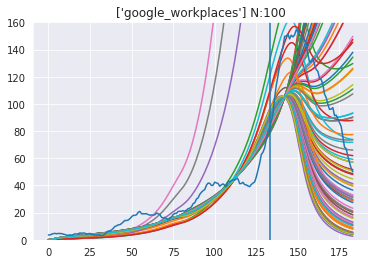

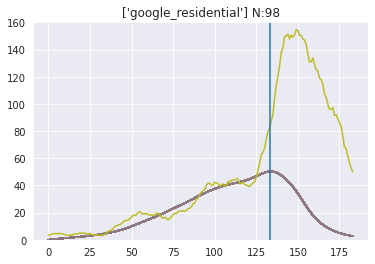

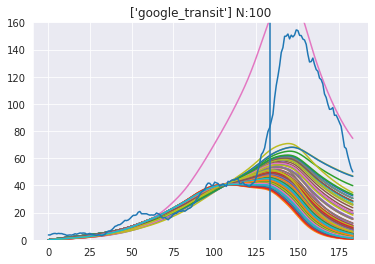

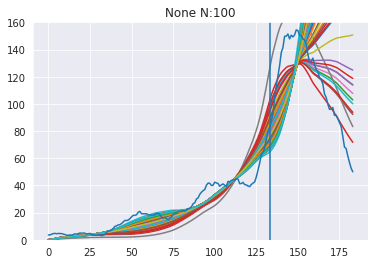

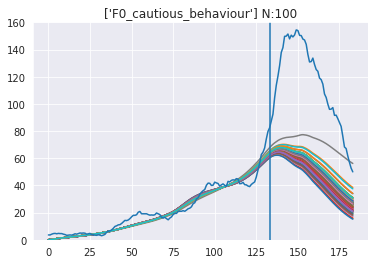

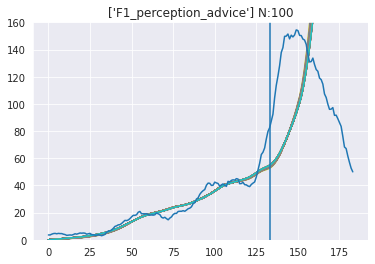

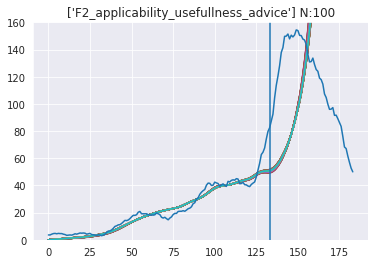

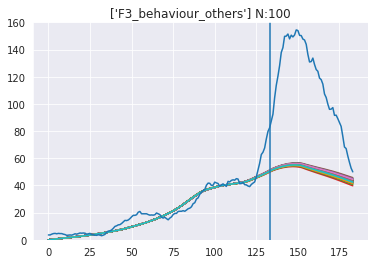

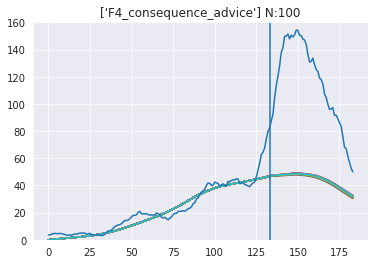

In [20]:
import os
dir_path = "../data/modeling/split_tests/split_test_prior/"


mse_df = pd.DataFrame(columns=['input', 'mse'])

for filename in os.listdir(dir_path):
    with open(dir_path+filename, 'rb') as f:
        # The protocol version used is detected automatically, so we do not
        # have to specify it.
        factors_info = pickle.load(f)

    for factor in factors_info.keys():

        df_test = pd.DataFrame(factors_info[factor]['meta_epoch_pred_test'])
        df_test.plot.line(legend=None)
        plt.plot(df_obs_filtered['hospitalization'])
        plt.axvline(x=split_idx)
        plt.ylim((0,160))
        plt.title(factor+f' N:{df_test.shape[1]}')
        plt.show()


        _df = pd.DataFrame({'input': [filename[0]+'_'+abreviation(factor)]*len(factors_info[factor]['meta_epoch_test_mse'].keys()), 'mse':list(factors_info[factor]['meta_epoch_test_mse'].values())})
        mse_df = pd.concat([mse_df,_df], ignore_index=True)


In [21]:
import plotly.express as px
fig = px.box(mse_df, x='input', y='mse')
fig.write_html("../data/modeling/split_tests/mse_prior.html")